In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [2]:
data = pd.read_csv('D:\Assignment\Decision Tree\Company_Data.csv')

In [3]:
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
data['Urban'].replace(to_replace=['Yes', 'No'],value= ['0', '1'], inplace=True)
data['US'].replace(to_replace=['Yes', 'No'],value= ['0', '1'], inplace=True)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,0,0
1,11.22,111,48,16,260,83,Good,65,10,0,0
2,10.06,113,35,10,269,80,Medium,59,12,0,0
3,7.40,117,100,4,466,97,Medium,55,14,0,0
4,4.15,141,64,3,340,128,Bad,38,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,0,0
396,6.14,139,23,3,37,120,Medium,55,11,1,0
397,7.41,162,26,12,368,159,Medium,40,18,0,0
398,5.94,100,79,7,284,95,Bad,50,12,0,0


In [6]:
#Complete company dataset
label_encoder= preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc']) 

In [7]:
x=data.drop(columns=['ShelveLoc'])
y=data['ShelveLoc']

In [8]:
x
pd.set_option("display.max_rows", None) 

In [9]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,0,0
1,11.22,111,48,16,260,83,65,10,0,0
2,10.06,113,35,10,269,80,59,12,0,0
3,7.40,117,100,4,466,97,55,14,0,0
4,4.15,141,64,3,340,128,38,13,0,1
5,10.81,124,113,13,501,72,78,16,1,0
6,6.63,115,105,0,45,108,71,15,0,1
7,11.85,136,81,15,425,120,67,10,0,0
8,6.54,132,110,0,108,124,76,10,1,1
9,4.69,132,113,0,131,124,76,17,1,0


In [10]:
y

0      0
1      1
2      2
3      2
4      0
5      0
6      2
7      1
8      2
9      2
10     0
11     1
12     2
13     1
14     1
15     2
16     1
17     1
18     1
19     2
20     2
21     1
22     2
23     2
24     0
25     1
26     1
27     2
28     0
29     0
30     1
31     2
32     1
33     1
34     2
35     2
36     1
37     2
38     2
39     0
40     0
41     0
42     2
43     2
44     2
45     0
46     2
47     0
48     0
49     1
50     0
51     0
52     0
53     2
54     2
55     2
56     2
57     0
58     0
59     2
60     0
61     2
62     0
63     2
64     2
65     2
66     2
67     2
68     1
69     2
70     1
71     2
72     2
73     1
74     2
75     0
76     2
77     2
78     2
79     0
80     0
81     1
82     1
83     0
84     0
85     2
86     2
87     1
88     2
89     2
90     2
91     2
92     2
93     2
94     0
95     2
96     1
97     0
98     1
99     0
100    2
101    2
102    2
103    0
104    2
105    2
106    2
107    2
108    0
109    2
110    2
1

In [11]:
data['ShelveLoc'].unique() 

array([0, 1, 2])

In [12]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [13]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40) 

In [14]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

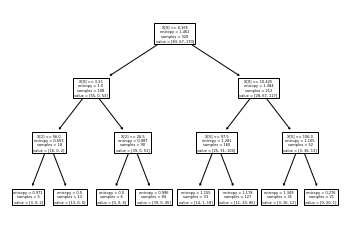

In [15]:
#PLot the decision tree
tree.plot_tree(model);


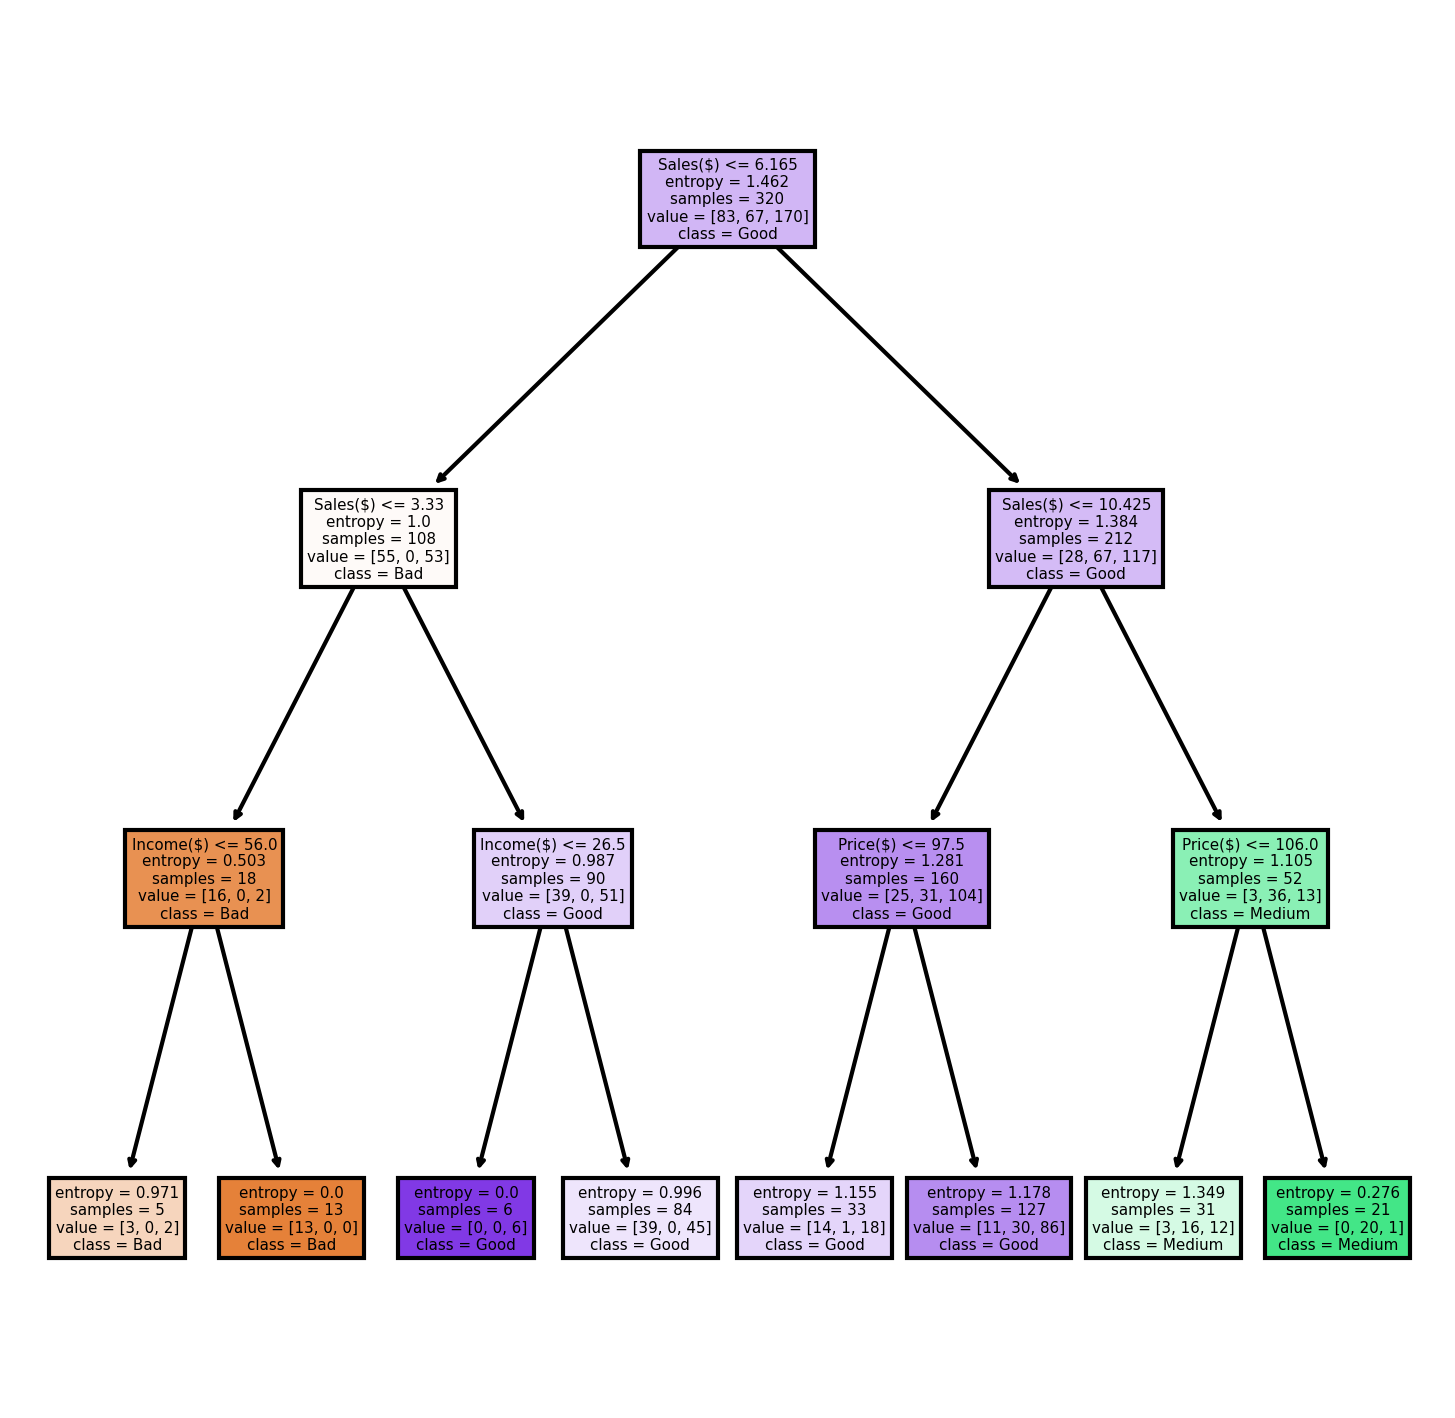

In [16]:
fn=['Sales($)','CompPrice($)','Income($)','Advertising($)','Population(no)','Price($)','Shelveloc(Category)','Age(no)','Education(no)','Urban(yes or no)','US(yes or no)']
cn=['Bad', 'Medium', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [17]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  


2    63
1    13
0     4
dtype: int64

In [18]:
preds 

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [19]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [20]:
# Accuracy 
np.mean(preds==y_test)

0.625